In [25]:
import numpy as np
import pandas as pd
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# from keras.layers.normalization import BatchNormalization
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
import seaborn as sns
import cv2
from tf_explain.core.grad_cam import GradCAM
from sklearn.svm import SVC


In [2]:
image = PIL.Image.open("boNhoNho.jpeg")
width,height = image.size
print(width,height)

300 200


In [3]:
import pathlib
def getData(labels,urls,dic_label):
    
    ds = []
    for label in labels :
      print(label)
      url = f"{urls}{label}"
      for filename in os.listdir(url):
        img = cv2.imread(os.path.join(url,filename))
        img = cv2.resize(img,(150,150))
        img = img.astype(np.float32)
        img /= 255.0
        img = np.asarray(img)
        ds.append([img,label])
    print(ds[0][0].shape)
    data =   np.asarray(ds)
    # data /= 255.0
    print(data.shape)
    x = np.asarray(data[:,0])
    x=np.array([np.array(val) for val in x])
    y = [dic_label[zi] for zi in data[:,1]]
    return x,y 

In [4]:
def plt_result(path,label):
  img = cv2.imread(path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(15,2))
  plt.imshow(img)
  plt.xlabel(label)
  plt.xticks([])
  plt.yticks([])
  plt.show()

In [5]:
  dic = {0 : "chicken",1: "dog",2 : "elephant",3 : "cat", 4 : "cow"}
  print(len(dic))

5


In [6]:
def get_predict_label(pred):
  dic = {0 : "chicken",1: "dog",2 : "elephant",3 : "cat", 4 : "cow"}
  return dic[np.argmax(pred)]

In [27]:
dic = {"chicken" : 0,"dog" : 1, "elephant" : 2,"cat" : 3 , "cow" : 4}
labels = ['chicken','dog','elephant','cat','cow']
url = f"F:/Nam3HK2/KHDL/final/dataset/khdl_dummy_data/"
url_val = f"F:/Nam3HK2/KHDL/final/dataset/validation_data/"
X_train,y_train = getData(labels,url,dic)
X_test,y_test=getData(labels,url_val,dic)

chicken
dog
elephant
cat
cow
(150, 150, 3)
(1020, 2)


C:\Users\phong\AppData\Local\Temp\ipykernel_5624\2698229286.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data =   np.asarray(ds)


chicken
dog
elephant
cat
cow
(150, 150, 3)
(240, 2)


In [29]:
svc = SVC(kernel='linear',gamma='auto')
lenofimage = len(X_train)
X_train= np.array(X_train).reshape(lenofimage,-1)

svc.fit(X_train, y_train)


SVC(gamma='auto', kernel='linear')

In [60]:
lenofimage = len(X_test)
X_test= np.array(X_test).reshape(lenofimage,-1)
y2 = svc.predict(X_test)

In [59]:


dicLabel = {0 : "chicken",1: "dog",2 : "elephant",3 : "cat", 4 : "cow"}
img = cv2.imread("t.jpg")
img = cv2.resize(img,(150,150))
data = img /255.0

lenofimage = len(data)
print(data.shape)
data= np.array(data).reshape(lenofimage,-1)
data= np.array(data).reshape(1,-1)
print(data.shape)
print(len(data))
y2 = svc.predict(data)
# print(y2)
dicLabel[y2[0]]

(150, 150, 3)
(1, 67500)
1


'chicken'

In [32]:
y2

array([0, 0, 4, 0, 4, 4, 1, 4, 1, 3, 1, 3, 3, 0, 0, 4, 0, 1, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 4, 4, 1, 1, 1, 3, 3, 1, 3, 1, 1, 4, 2, 2, 1, 1, 3, 2, 0, 0, 3,
       0, 3, 2, 4, 1, 4, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 1,
       1, 2, 2, 2, 1, 3, 0, 0, 2, 3, 3, 2, 1, 1, 3, 0, 4, 2, 4, 4, 0, 4,
       3, 3, 4, 4, 4, 4, 1, 3, 4, 2, 4, 4, 1, 4, 0, 0, 2, 1, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [8]:
# model = models.Sequential()
# model.add(layers.Conv2D(64, (3, 3), padding='same',activation='relu', input_shape=(244, 244, 3)))
# model.add(layers.Conv2D(64, (3, 3), padding='same',activation='relu'))
# model.add(BatchNormalization())
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3),padding='same', activation='relu'))
# model.add(layers.Conv2D(128, (3, 3),padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(256, (3, 3), padding='same',activation='relu'))
# model.add(layers.Conv2D(256, (3, 3), padding='same',activation='relu'))
# model.add(layers.Conv2D(256, (3, 3), padding='same',activation='relu'))
# model.add(BatchNormalization())
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(512, (3, 3), padding='same',activation='relu'))
# model.add(layers.Conv2D(512, (3, 3), padding='same',activation='relu'))
# model.add(layers.Conv2D(512, (3, 3), padding='same',activation='relu'))
# model.add(BatchNormalization())
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(512, (3, 3), padding='same',activation='relu'))
# model.add(layers.Conv2D(512, (3, 3), padding='same',activation='relu'))
# model.add(layers.Conv2D(512, (3, 3), padding='same',activation='relu'))
# model.add(BatchNormalization())
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Flatten())
# model.add(layers.Dense(4096, activation='relu'))
# model.add(layers.Dense(4096, activation='relu'))
# model.add(BatchNormalization())
# model.add(layers.Dense(5))

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5))

# chuan

In [10]:
# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
# model.add(layers.Conv2D(32, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(256, (3, 3), activation='relu'))
# model.add(layers.Conv2D(256, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Flatten())
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dense(5))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 146, 146, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 35, 35, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 33, 33, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 128)      0

In [12]:
model.compile(optimizer='adam',
             
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
x_train = tf.convert_to_tensor(X_train)
y_train = tf.convert_to_tensor(y_train)
x_test = tf.convert_to_tensor(X_test)
y_test = tf.convert_to_tensor(y_test)
history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=15 )

Epoch 1/15
32/32 [==============================] - 6s 105ms/step - loss: 1.6532 - accuracy: 0.1922 - val_loss: 1.6018 - val_accuracy: 0.2708
Epoch 2/15
32/32 [==============================] - 2s 75ms/step - loss: 1.5609 - accuracy: 0.2863 - val_loss: 1.5507 - val_accuracy: 0.2625
Epoch 3/15
32/32 [==============================] - 2s 77ms/step - loss: 1.5046 - accuracy: 0.3353 - val_loss: 1.4382 - val_accuracy: 0.3833
Epoch 4/15
32/32 [==============================] - 2s 75ms/step - loss: 1.3718 - accuracy: 0.4216 - val_loss: 1.3589 - val_accuracy: 0.4125
Epoch 5/15
32/32 [==============================] - 2s 75ms/step - loss: 1.2232 - accuracy: 0.4922 - val_loss: 1.2097 - val_accuracy: 0.4958
Epoch 6/15
32/32 [==============================] - 2s 75ms/step - loss: 1.0203 - accuracy: 0.5912 - val_loss: 1.0527 - val_accuracy: 0.6167
Epoch 7/15
32/32 [==============================] - 2s 75ms/step - loss: 0.7970 - accuracy: 0.6912 - val_loss: 1.1008 - val_accuracy: 0.6083
Epoch 8/15
3

ValueError: Found array with dim 4. Estimator expected <= 2.

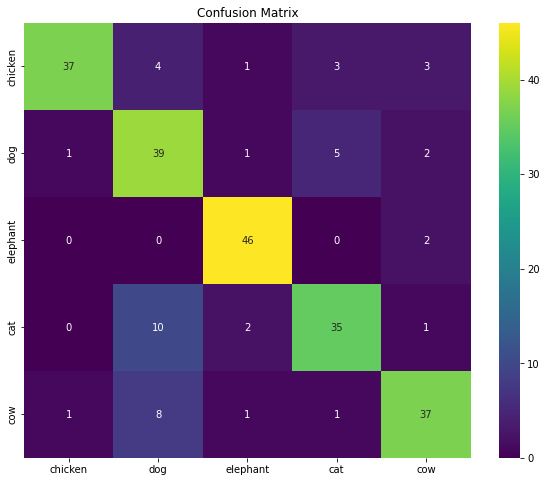

In [13]:
dicLabel = {0 : "chicken",1: "dog",2 : "elephant",3 : "cat", 4 : "cow"}
y_predict=model.predict(x_test)

y_pred_labels =np.argmax(y_predict,axis=1)
y_true_labels = y_test
labels = [0,1,2,3,4]
textLabel =  ['chicken','dog','elephant','cat','cow']
conf_mat = confusion_matrix(y_true_labels, y_pred_labels, labels=labels)
df_cm = pd.DataFrame(conf_mat, index = textLabel,
                     columns = textLabel)
plt.figure(figsize = (10,8))
plt.title('Confusion Matrix')
sns.heatmap(df_cm, annot=True, cmap='viridis')
plt.show()

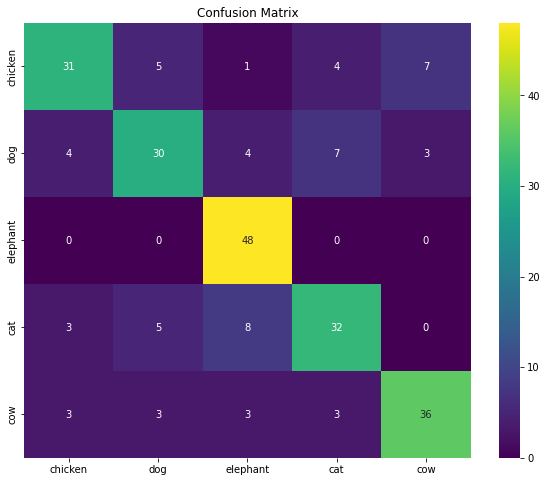

In [61]:
dicLabel = {0 : "chicken",1: "dog",2 : "elephant",3 : "cat", 4 : "cow"}
y_pred_labels =y2
y_true_labels = y_test
labels = [0,1,2,3,4]
textLabel =  ['chicken','dog','elephant','cat','cow']
conf_mat = confusion_matrix(y_true_labels, y_pred_labels, labels=labels)
df_cm = pd.DataFrame(conf_mat, index = textLabel,
                     columns = textLabel)
plt.figure(figsize = (10,8))
plt.title('Confusion Matrix')
sns.heatmap(df_cm, annot=True, cmap='viridis')
plt.show()

In [14]:
def plt_analytic(history):
   plt.plot(history.history['accuracy'])
   plt.plot(history.history['val_accuracy'])
   plt.title('model accuracy')
   plt.ylabel('accuracy')
   plt.xlabel('epoch')
   plt.legend(['train', 'test'], loc='upper left')
   plt.show()
   # summarize history for loss
   plt.plot(history.history['loss'])
   plt.plot(history.history['val_loss'])
   plt.title('model loss')
   plt.ylabel('loss')
   plt.xlabel('epoch')
   plt.legend(['train', 'test'], loc='upper left')
   plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


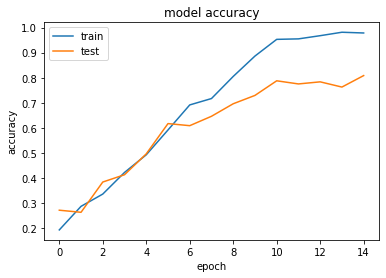

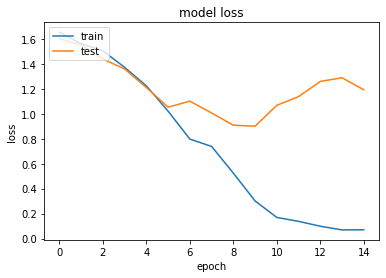

In [15]:
print(history.history.keys())
plt_analytic(history)

[[-156.22887 1998.38     -19.96019 -295.3079   307.1308 ]]
1
{'chicken': 0, 'dog': 1, 'elephant': 2, 'cat': 3, 'cow': 4}


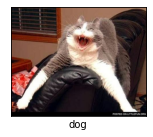

In [16]:
from tensorflow.keras.preprocessing import image
path = "meoHet.png"
img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

preds = model.predict(x)

print(preds)
print(np.argmax(preds))
print(dic)
label = get_predict_label(preds)
plt_result(path,label)


In [17]:
def activation_visualise(image, model, layers):
    explainer = ExtractActivations()
    output = explainer.explain([image], model, layers_name=layers)
    return output

In [18]:
def gradcam_visualise(data, model, class_index):
    explainer = GradCAM()
    output = explainer.explain(data, model, class_index=class_index)
    return output

In [19]:
def plot_data_four(class_name, outputs):
    fig = plt.figure(figsize=(16, 16))
    plt.suptitle(class_name)
    plt.subplot(2,2,1)
    plt.imshow(outputs[0])
    plt.subplot(2,2,2)
    plt.imshow(outputs[1])
    plt.subplot(2,2,3)
    plt.imshow(outputs[2])
    plt.subplot(2,2,4)
    plt.imshow(outputs[3])
    plt.show()

In [22]:
def grad_cam(model,image_path,class_index):
    output_data = []
    img = cv2.imread(image_path)
    img = cv2.resize(img,(150,150))
  
    data = ([img], None)
    output = gradcam_visualise(data, model, class_index)
    plt.figure(figsize=(5, 5))
    plt.imshow(output)

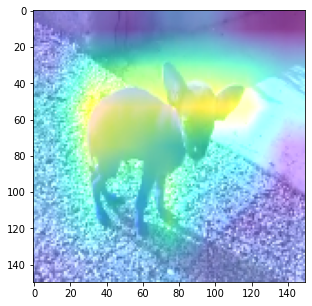

In [23]:

grad_cam(model,"choDo.png",1)